# Proyecto de Análisis EDA - Datos Bursátiles Mundiales

Proyecto intermedio con análisis EDA de la clase de Desarrollo de Proyectos de la Maestría en Ciencia de los Datos (MCD).

## Contenido

1. Introducción
2. Descripción de los Datos
3. Limpieza de datos
4. Missing Values
5. Visualización de Datos
6. Referencias

## 1. Introducción

En este trabajo se analiza el dataset 'Stock Exchange Data' y se encuentra disponible en el siguiente [enlace](https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data). Este proviene de datos recolectados en Yahoo Finance y fue publicado por Cody, un usuario de [Kaggle](https://www.kaggle.com/mattiuzc).

El dataset contiene datos de precios diarios para índices que rastrean bolsas de valores de todo el mundo (Estados Unidos, China, Canadá, Alemania, Japón y más). Los precios se cotizan en términos de la moneda nacional del país donde se encuentra cada bolsa de valores, pero se incluye además el precio al cierre en dólares para cada entrada de datos.

Los siguientes atributos se encuentran contenidos en el dataset:
- **Index**. Símbolo bursátil del índice bursátil.
- **Date**. Fecha  de la observación.
- **Open**. Precio de apertura.
- **High**. Precio más alto durante el día de intercambio.
- **Low**. Precio más bajo durante el día de intercambio.
- **Close**. Precio de cierre.
- **Adj Close**. Precio de cierre ajustado por dividendos y splits de acciones.
- **CloseUSD**. Precio de cierre en términos de dólares estadounidenses.
- **Volume**. Número de acciones negociadas durante el día de negociación.
- **Region**. País en el que se encuentra el mercado de valores.
- **Exchange**. Nombre del mercado de valores.
- **Currency**. Moneda en la que cotiza el índice.

## 2. Descripción de los Datos

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt


In [2]:
# Load Datasets

dire = "../data/"
file1 = "indexInfo.csv"
file2 = "indexProcessed.csv"

info = pd.read_csv(dire + file1)
df = pd.read_csv(dire + file2)

In [3]:
# Variables
info.columns

Index(['Region', 'Exchange', 'Index', 'Currency'], dtype='object')

In [4]:
df.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD'],
      dtype='object')

In [5]:
# Se combinan ambos datasets a través de la columna Index.

df = df.merge(info, on = "Index", how = "inner" )
df.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD', 'Region', 'Exchange', 'Currency'],
      dtype='object')

In [6]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104224 entries, 0 to 104223
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
 9   Region     104224 non-null  object 
 10  Exchange   104224 non-null  object 
 11  Currency   104224 non-null  object 
dtypes: float64(7), object(5)
memory usage: 10.3+ MB


Se puede ver que la columna 'date' no esta siendo detectada como fecha.

In [7]:
# Se arregla la fecha.

df['Date'] = pd.to_datetime(df['Date'])  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104224 entries, 0 to 104223
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      104224 non-null  object        
 1   Date       104224 non-null  datetime64[ns]
 2   Open       104224 non-null  float64       
 3   High       104224 non-null  float64       
 4   Low        104224 non-null  float64       
 5   Close      104224 non-null  float64       
 6   Adj Close  104224 non-null  float64       
 7   Volume     104224 non-null  float64       
 8   CloseUSD   104224 non-null  float64       
 9   Region     104224 non-null  object        
 10  Exchange   104224 non-null  object        
 11  Currency   104224 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 10.3+ MB


In [9]:
## Variables cuantitativas
df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [10]:
# Número de términos únicos por variable
df.nunique()

Index           13
Date         14657
Open         96716
High         96830
Low          96663
Close        96764
Adj Close    97602
Volume       50561
CloseUSD     99179
Region          11
Exchange        13
Currency        10
dtype: int64

###  Información general de la base de datos

In [11]:
# fechas
print("- El rango de fechas va desde {0} hasta {1}.".format(df.Date.unique().min(), df.Date.unique().max()))

- El rango de fechas va desde 1965-01-05T00:00:00.000000000 hasta 2021-06-03T00:00:00.000000000.


In [12]:
print("- En la base de datos se consideraron {0} índices bursátiles distintos:".format(len(df.Exchange.unique())))
for i in df.Index.unique():
    print("    * "+i)

- En la base de datos se consideraron 13 índices bursátiles distintos:
    * HSI
    * NYA
    * IXIC
    * 000001.SS
    * N225
    * N100
    * 399001.SZ
    * GSPTSE
    * NSEI
    * GDAXI
    * SSMI
    * TWII
    * J203.JO


In [13]:
print("- En la base de datos se consideraron {0} bolsas de valores distintas:".format(len(df.Exchange.unique())))
for i in df.Exchange.unique():
    print("    * "+i)

- En la base de datos se consideraron 13 bolsas de valores distintas:
    * Hong Kong Stock Exchange
    * New York Stock Exchange
    * NASDAQ
    * Shanghai Stock Exchange
    * Tokyo Stock Exchange
    * Euronext
    * Shenzhen Stock Exchange
    * Toronto Stock Exchange
    * National Stock Exchange of India
    * Frankfurt Stock Exchange
    * SIX Swiss Exchange
    * Taiwan Stock Exchange
    * Johannesburg Stock Exchange


In [14]:
# precios
print("- El rango de Precios de Cierre (CloseUSD) va de un min {0} hasta {1} dólares, y su promedio es {2}".format(df.CloseUSD.unique().min(),
                                                                                      df.CloseUSD.unique().max(),
                                                                 np.round(pd.to_numeric(df.CloseUSD).mean(), 2)))

- El rango de Precios de Cierre (CloseUSD) va de un min 10.2048999 hasta 18934.3761734 dólares, y su promedio es 3046.73


In [15]:
df.groupby('Index')['Date'].agg(['count','min', 'max']).merge(info[["Index", "Exchange"]] , on = "Index", how = "inner" )

,Index,count,min,max,Exchange
0,000001.SS,5791,1997-07-02,2021-05-31,Shanghai Stock Exchange
1,399001.SZ,5760,1997-08-22,2021-06-02,Shenzhen Stock Exchange
2,GDAXI,8438,1987-12-30,2021-05-31,Frankfurt Stock Exchange
3,GSPTSE,10526,1979-06-29,2021-05-31,Toronto Stock Exchange
4,HSI,8492,1986-12-31,2021-05-31,Hong Kong Stock Exchange
5,IXIC,12690,1971-02-05,2021-05-28,NASDAQ
6,J203.JO,2346,2012-02-08,2021-05-31,Johannesburg Stock Exchange
7,N100,5474,1999-12-31,2021-06-02,Euronext
8,N225,13874,1965-01-05,2021-06-03,Tokyo Stock Exchange
9,NSEI,3346,2007-09-17,2021-05-31,National Stock Exchange of India


## 3. Limpieza de los Datos

In [16]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,Hong Kong,Hong Kong Stock Exchange,HKD


In [17]:
# eliminar variable `Volume` que en su mayoría sólo tiene 0, y `ptid` que sólo cuenta con 1 valor (15.)
try:
    df.drop(columns=['Volume'], inplace=True)
except:
    next
    
df.head()



,Index,Date,Open,High,Low,Close,Adj Close,CloseUSD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,333.879006,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,330.213013,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,331.811987,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,335.906987,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,338.923013,Hong Kong,Hong Kong Stock Exchange,HKD


In [18]:
# revisar tipo de variable
df.dtypes

Index                object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
CloseUSD            float64
Region               object
Exchange             object
Currency             object
dtype: object

No hay cambios que realizar.

In [19]:
# Información general, segunda revisión
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104224 entries, 0 to 104223
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      104224 non-null  object        
 1   Date       104224 non-null  datetime64[ns]
 2   Open       104224 non-null  float64       
 3   High       104224 non-null  float64       
 4   Low        104224 non-null  float64       
 5   Close      104224 non-null  float64       
 6   Adj Close  104224 non-null  float64       
 7   CloseUSD   104224 non-null  float64       
 8   Region     104224 non-null  object        
 9   Exchange   104224 non-null  object        
 10  Currency   104224 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 9.5+ MB


In [20]:
## Variables cuantitativas, segunda revisión
df.describe()

,Open,High,Low,Close,Adj Close,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,18934.376173


## 4. Missing Values

In [21]:
# Revisar los missing values
df.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
CloseUSD     0
Region       0
Exchange     0
Currency     0
dtype: int64

Ninguna de las variables tienen valores nulos (NaN).

## 5. Visualización de Datos

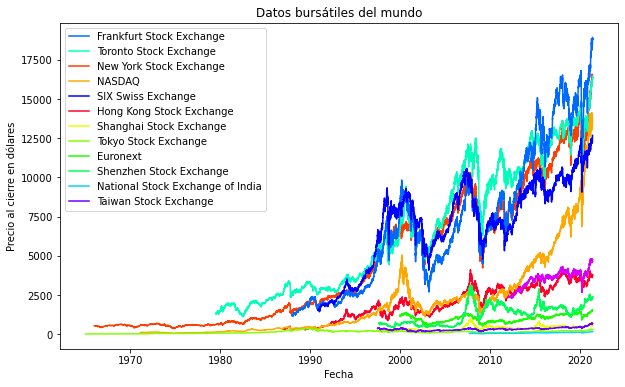

In [22]:
dates = sorted(df.Date.unique())

exchanges = df.Exchange.unique()
fig = plt.figure(figsize=(10,6))

NUM_COLORS = len(df.Exchange.unique())
cm = plt.get_cmap('gist_rainbow')
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i in exchanges:
    temp = df[df.Exchange == i][['Date', 'CloseUSD']]
    ax.plot(temp.Date, temp.CloseUSD, label = i)

plt.title("Datos bursátiles del mundo")
plt.xlabel("Fecha")
plt.ylabel("Precio al cierre en dólares")


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [9,7,1,2,10,0,3,4,5,6,8,11]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 

fig.savefig('../results/stocks.png')


## 6. Referencias

- Stock Exchange. Cody. Kaggle. https://www.kaggle.com/datasets/mattiuzc/stock-exchange
- Actividad 13. https://github.com/vcuspinera/UDG_MCD_Project_Dev_II/blob/main/actividades/13_EDA.ipynb